In [1]:
!pip install paddlepaddle
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 48633, done.
remote: Counting objects: 100% (988/988), done.
remote: Compressing objects: 100% (753/753), done.
remote: Total 48633 (delta 316), reused 750 (delta 223), pack-reused 47645
Receiving objects: 100% (48633/48633), 346.55 MiB | 23.37 MiB/s, done.
Resolving deltas: 100% (33989/33989), done.
Updating files: 100% (1923/1923), done.


In [3]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import glob

In [4]:
!unzip Test.zip

Archive:  Test.zip
   creating: Images/
  inflating: Images/1960_png.rf.4c0bf49e49535f0397f74cc03879038c.jpg  
  inflating: Images/1961_png.rf.f3b11f69368442c528130663426f6fc2.jpg  
  inflating: Images/1962_png.rf.7b13fe7293d5a5204d8afea1450e1ea4.jpg  
  inflating: Images/1963_png.rf.9bfeb482c4b38cdb38318e061fa61caa.jpg  
  inflating: Images/1964_png.rf.9ba5fe1e8d5ee63b98884c7f40a37e45.jpg  
  inflating: Images/1965_png.rf.bdc42f380d7b456ac025329b73a3e728.jpg  
  inflating: Images/1966_png.rf.8ba1f4ed99892d72eb1449fe4f3911bf.jpg  
  inflating: Images/1969_png.rf.e8dde71f4e715f007e3733e485e91da1.jpg  
  inflating: Images/1970_png.rf.fe05c861f85342a61fbd79c73482493b.jpg  
  inflating: Images/1971_png.rf.76ed78c90f529877029ccc779260d3b5.jpg  
  inflating: Images/2012_png.rf.c3a7f1bccfa2accf3145356a3c1383fa.jpg  
  inflating: Images/2013_png.rf.e73633940d8147ce86ccbe880885d4ab.jpg  
  inflating: Images/2014_png.rf.377ae8e3cc2878cdb28683c8bcc084e1.jpg  
  inflating: Images/covid19_confirmed

In [5]:
ocr_model = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 244kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:17<00:00, 599kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 148kiB/s]

[2024/04/25 17:10:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [6]:
img_path = '/content/Images'

In [7]:
img_paths = glob.glob(img_path + '*.png')

In [8]:
results = {}

In [14]:
import pandas as pd
annotations_df = pd.read_csv("annotation.csv")

data=[]
for row in annotations_df.itertuples():
    file_name = row[1]
    map_type = row[5]
    title_bounding_box = row[3]
    legend_bounding_box = row[4]
    data.append((file_name, map_type, title_bounding_box, legend_bounding_box))

print(data)

[('map_5088_png.rf.d34c5c339a19f9fba7f1ae8018fd321a.jpg', 'discrete', "(' 3', ' 36', ' 30', ' 309')", "(' 460', ' 87', ' 493', ' 643')"), ('map_57.png', 'continuous', "(' 13', ' 41', ' 44', ' 484')", "(' 72', ' 609', ' 490', ' 692')"), ('map_17.png', 'discrete', "(' 2', ' 27', ' 30', ' 400')", "(' 459', ' 80', ' 486', ' 667')"), ('1971_png.rf.76ed78c90f529877029ccc779260d3b5.jpg', 'continuous', "(' 4', ' 947', ' 38', ' 1212')", "(' 44', ' 933', ' 848', ' 1049')"), ('map_51.png', 'continuous', "(' 15', ' 39', ' 44', ' 690')", "(' 75', ' 602', ' 485', ' 691')"), ('map_5072_png.rf.1fe4d92c96229351158607351b9e4cde.jpg', 'discrete', "(' 18', ' 51', ' 46', ' 343')", "(' 235', ' 559', ' 308', ' 691')"), ('covid19_new_cases_usa-20210716_png.rf.45ae0fe9bfe76b4622618017810416a7.jpg', 'continuous', "(' 32', ' 303', ' 90', ' 737')", "(' 60', ' 922', ' 553', ' 1039')"), ('map_62.png', 'continuous', "(' 3', ' 24', ' 31', ' 436')", "(' 67', ' 614', ' 487', ' 695')"), ('map_26.png', 'discrete', "(' 19

In [31]:
# Function to convert bound variables to doubles and extract units
def convert_to_doubles(low, upper_bound):
  low=lower_bound.replace(",", "")
  up=upper_bound.replace(",", "")
  print(low)
  print(up)
  # Check if last character of lower_bound is not a digit
  if low and not low[-1].isdigit():
      units = low[-1]
      low = float(low[:-1])
  else:
      units = 'u'
      low = float(low)

  # Check if last character of upper_bound is not a digit
  if up and not up[-1].isdigit():
      units = up[-1]
      up = float(up[:-1])
  else:
      units = 'u'
      up = float(up)

  return low, up, units

In [11]:
from google.colab.patches import cv2_imshow
import logging

# Suppress PaddleOCR warning and debug messages
logging.getLogger("PaddleOCR").setLevel(logging.ERROR)

for img_path in img_paths:
    result = ocr_model.ocr(img_path)
    results[img_path] = result

def num_there(s):
    return any(i.isdigit() for i in s)

def only_num(s):
    return s.isnumeric()

def contains_hyphen(text):
    """
    Check if the given text contains the character '-'.

    Args:
        text (str): The text to check.

    Returns:
        bool: True if the text contains '-', False otherwise.
    """
    return '-' in text

In [12]:
def extract_numbers(test_string):
  # Initialize a translation table to remove non-numeric characters
  translation_table = str.maketrans('', '', 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
  # Use str.translate() with the translation table to remove non-numeric characters
  numeric_string = test_string.translate(translation_table)
  # Use str.split() to split the string into a list of word
  words = numeric_string.split()
  numbers = [int(i) for i in words]
  # print("The numbers list is : " + str(numbers))
  return numbers

map_5088_png.rf.d34c5c339a19f9fba7f1ae8018fd321a.jpg


[2024/04/25 17:55:22] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.06159687042236328
[2024/04/25 17:55:22] ppocr DEBUG: rec_res num  : 1, elapsed : 0.12951254844665527
The Percentage of reservations in the USA


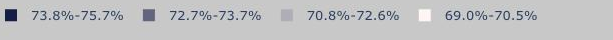

[2024/04/25 17:55:22] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.17244672775268555
[2024/04/25 17:55:23] ppocr DEBUG: rec_res num  : 6, elapsed : 0.5339694023132324
73.8%-75.7%
[254 254 254]
72.7%-73.7%
[125 102 100]
70.8%-72.6%
[128 102  96]
69.0%-70.5%
[242 242 242]
73.8%
75.7%
72.7%
73.7%
70.8%
72.6%
69.0%
70.5%
map_57.png


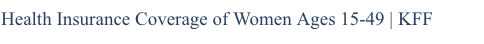

[2024/04/25 17:55:23] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.11030149459838867
[2024/04/25 17:55:23] ppocr DEBUG: rec_res num  : 1, elapsed : 0.3407778739929199
Health Insurance Coverage of Women Ages 15-49 | KFF


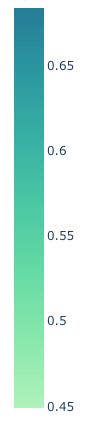

[2024/04/25 17:55:23] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.03045964241027832
[2024/04/25 17:55:24] ppocr DEBUG: rec_res num  : 5, elapsed : 0.31487202644348145
0.65
[153 130  38]
0.6
[161 162  48]
0.55
[163 195  71]
0.5
[165 218 101]
0.45
[177 235 151]
0.65
0.65
0.6
0.6
0.55
0.55
0.5
0.5
0.45
0.45
map_17.png


[2024/04/25 17:55:24] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.05567145347595215
[2024/04/25 17:55:24] ppocr DEBUG: rec_res num  : 1, elapsed : 0.39313530921936035
Health Insurance Coverage of Men 19-64 | KFF


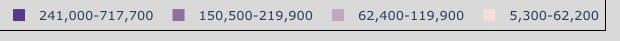

[2024/04/25 17:55:24] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.023833036422729492
[2024/04/25 17:55:25] ppocr DEBUG: rec_res num  : 6, elapsed : 0.34584999084472656
241,000-717,700
[217 217 217]
150,500-219,900
[107 105 112]
-
[213 212 212]
62,400-119,900
[124 114 126]
5,300-62,200
[251 251 251]
241000
717700
150500
219900
62400
119900
5300
62200
1971_png.rf.76ed78c90f529877029ccc779260d3b5.jpg


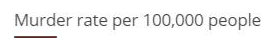

[2024/04/25 17:55:25] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.05215334892272949
[2024/04/25 17:55:25] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1163938045501709
Murder rate per 100,000 people


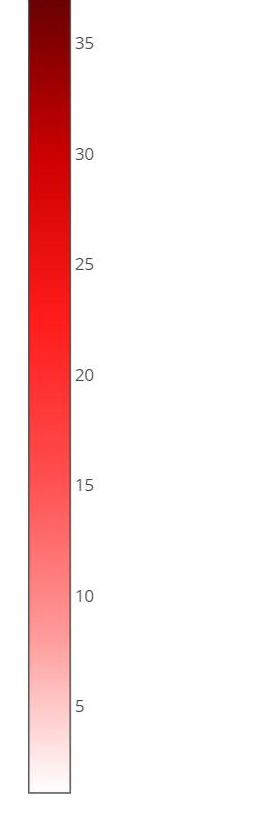

[2024/04/25 17:55:25] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.18709373474121094
[2024/04/25 17:55:26] ppocr DEBUG: rec_res num  : 7, elapsed : 0.4537372589111328
35
[255 254 255]
30
[255 254 255]
25
[253 255 255]
20
[255 254 255]
15
[255 255 252]
10
[255 254 255]
5
[255 255 254]
35
35
30
30
25
25
20
20
15
15
10
10
5
5
map_51.png


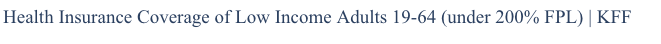

[2024/04/25 17:55:26] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.12752914428710938
[2024/04/25 17:55:26] ppocr DEBUG: rec_res num  : 1, elapsed : 0.22823190689086914
Health Insurance Coverage of Low Income Adults 19-64 (under 200% FPL)| KFF


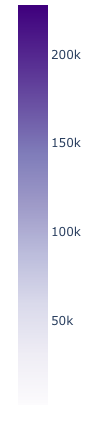

[2024/04/25 17:55:26] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.03915810585021973
[2024/04/25 17:55:26] ppocr DEBUG: rec_res num  : 4, elapsed : 0.2827737331390381
200k
[127   5  65]
150k
[161  78 104]
100k
[195 145 148]
50k
[225 200 199]
200k
200k
150k
150k
100k
100k
50k
50k
map_5072_png.rf.1fe4d92c96229351158607351b9e4cde.jpg


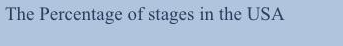

[2024/04/25 17:55:26] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.09454488754272461
[2024/04/25 17:55:27] ppocr DEBUG: rec_res num  : 1, elapsed : 0.19798755645751953
The Percentage of stages in the USA


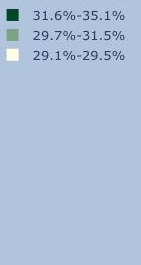

[2024/04/25 17:55:27] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.12358999252319336
[2024/04/25 17:55:27] ppocr DEBUG: rec_res num  : 3, elapsed : 0.313399076461792
31.6%-35.1%


IndexError: index -701 is out of bounds for axis 1 with size 700

In [35]:
# Code to obtain OCR results on the map image by splitting into 2 sub-images
# The 2 sub-images will contain only the Title and only the legend/colour bar area.
# Thus, we perform OCR on the 2 sub-images separately and store the results.

from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
from numpy import asarray

# title_bounding_box = [159, 17, 272, 29]
# legend_bounding_box = [249, 471, 325, 25]

complete_data = []

for ele in data:
  file_name = ele[0]
  print(file_name)
  map_type = ele[1]
  title_bounding_box = ele[2]
  legend_bounding_box = ele[3]

  values = extract_numbers(title_bounding_box)

  imgPath = "/content/Images/"+file_name
  image = cv2.imread(imgPath)

  y, x, h, w = values

  cropped_img = image[y:y+h, x:x+w]
  cv2_imshow(cropped_img)
  numpydata = asarray(cropped_img)

  result = ocr_model.ocr(numpydata, cls=False)
  map_title = result[0][0][1][0]

  print(map_title)
  # results[imgPath] = result

  numerical_info = []
  values = extract_numbers(legend_bounding_box)
  y, x, h, w = values

  cropped_img = image[y:y+h, x:x+w]
  cv2_imshow(cropped_img)
  numpydata = asarray(cropped_img)

  result = ocr_model.ocr(numpydata, cls=False)

  for line in result:
    for word in line:
      text = word[1][0]
      print(text)
      x, y, w, h = word[0][0][0], word[0][0][1], abs(word[0][0][0]-word[0][1][0]), abs(word[0][1][1]-word[0][2][1])

      x1 = int(x)
      y1 = int(y+w+h//2)
      x2 = int(x)
      y2 = int(y+w+h//2-1)

      while all(image[y1, x1]==image[y2, x2]):
        x2-=1
      x3 = x2
      while all(image[y1, x1]==image[y2, x3]):
        x3-=1

      x2 = (x2+x3)//2
      color = image[y2,x2]
      print(color)
      blue, green, red = color
      numerical_info += [text] + [red, green, blue]

  i=0
  value_id = 0
  while i<len(numerical_info):
    value_id += 1

    if numerical_info[i]!="N/A" and numerical_info[i]!="-":
      values = numerical_info[i].split("-")

      if len(values)>1:
        lower_bound = values[0]
        upper_bound = values[1]
      else:
        lower_bound = values[0]
        upper_bound = values[0]

      converted_lower_bound, converted_upper_bound, units = convert_to_doubles(lower_bound, upper_bound)
      info = [file_name, map_type, map_title, numerical_info[i+1], numerical_info[i+2], numerical_info[i+3], (converted_lower_bound+converted_upper_bound)/2, units]

    else:
      values = "N/A"
      info = [file_name, map_type, map_title, numerical_info[i+1], numerical_info[i+2], numerical_info[i+3], values, ""]
    map_name = img_path.split("/")[-1].split(".")[0]
    info = [map_name] + info
    complete_data += [info]

    i+=4

print(complete_data)

In [ ]:
# # Code to obtain OCR results on the map image by splitting into 2 sub-images
# # The 2 sub-images will contain only the Title and only the legend/colour bar area.
# # Thus, we perform OCR on the 2 sub-images separately and store the results.

# from google.colab.patches import cv2_imshow
# import numpy as np
# from PIL import Image
# from numpy import asarray

# # title_bounding_box = [159, 17, 272, 29]
# # legend_bounding_box = [249, 471, 325, 25]

# complete_data = []

# for img_path in img_paths:
#   # for ele in data:
#   #   print(ele)
#   #   complete_data += ele[1]
#   # title_info = []
#   x, y, w, h = title_bounding_box
#   x = x - (w//2)
#   y = y - (h//2)

#   image = cv2.imread(img_path)
#   cropped_img = image[y:y+h, x:x+w]
#   cv2_imshow(cropped_img)
#   numpydata = asarray(cropped_img)

#   result = ocr_model.ocr(numpydata, cls=False)
#   title = result[0][0][1][0]
#   # title_info += title
#   complete_data += [title]
#   print(title)
#   results[img_path] = result

#   numerical_info = []
#   x, y, w, h = legend_bounding_box
#   x = x - (w//2)
#   y = y - (h//2)

#   cropped_img = image[y:y+h, x:x+w]
#   cv2_imshow(cropped_img)
#   numpydata = asarray(cropped_img)

#   result = ocr_model.ocr(numpydata, cls=False)

#   for line in result:
#     for word in line:
#       print(word)

#       text = word[1][0]
#       print(text)
#       x, y, w, h = word[0][0][0], word[0][0][1], abs(word[0][0][0]-word[0][1][0]), abs(word[0][1][1]-word[0][2][1])

#       x1 = int(x)
#       y1 = int(y+h//2)
#       x2 = int(x)
#       y2 = int(y+h//2- 1)

#       while all(image[y1, x1]==image[y2, x2]):
#         x2-=1
#       x3 = x2
#       while all(image[y1, x1]==image[y2, x3]):
#         x3-=1

#       x2 = (x2+x3)//2
#       color = image[y2,x2]
#       blue, green, red = color
#       numerical_info += [text] + [red, green, blue]

#   i=0
#   value_id = 0
#   while i<len(numerical_info):
#     value_id += 1

#     if numerical_info[i]!="N/A":
#       values = numerical_info[i].split("-")

#       if len(values)>1:
#         lower_bound = values[0]
#         upper_bound = values[1]
#       else:
#         lower_bound = values[0]
#         upper_bound = values[0]

#       converted_lower_bound, converted_upper_bound, units = convert_to_doubles(lower_bound, upper_bound)
#       info = [value_id, numerical_info[i+1], numerical_info[i+2], numerical_info[i+3], (converted_lower_bound+converted_upper_bound)/2, units]

#     else:
#       values = "N/A"
#       info = [value_id, numerical_info[i+1], numerical_info[i+2], numerical_info[i+3], values, ""]
#     map_name = img_path.split("/")[-1].split(".")[0]
#     info = [map_name] + info
#     complete_data += [info]

#     i+=4

# print(complete_data)


# # Draw the bounding box on the image
# # color = (0, 255, 0)  # BGR color format (green in this case)
# # thickness = 4
# # # color1 = (255, 0, 0)

# # cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)
# # cv2_imshow(image)

In [ ]:
with open('/content/output.txt', 'w') as f:
    # Loop through the list and write each element to the file
    for item in complete_data:
        f.write(str(item) + '\n')


output_df = pd.Dataframe(complete_data)
output_df.to_csv('OCR_output.csv',index = False)

In [ ]:
results